# Compare charcoal results when the database is GTDB reps vs. GTDB full

This notebook analyzes the output of charcoal for the same set of genomes when the database is either GTDB reps or GTDB full. It looks at 12,921 genomes from 483 orders from GTDB full.

In [1]:
setwd("..")

In [17]:
# change default figure size
options(repr.plot.width=15, repr.plot.height=7)
# disable scientific notation (for plot axes)
options(scipen = 999)

In [3]:
library(dplyr)
library(janitor)
library(purrr)
library(readr)
library(ggplot2)
library(tidyr)
library(ggpubr)
# source("~/github/2022-microberna/scripts/utils.R")

## Download and read in GTDB metadata

In [4]:
# if files doesn't exist locally, download and save
destfile <- "inputs/gtdb/bac120_metadata_r202.tar.gz"
url <- "https://data.ace.uq.edu.au/public/gtdb/data/releases/release202/202.0/bac120_metadata_r202.tar.gz"
if (!file.exists(destfile)) {
  download.file(url, destfile, method="auto") 
}
outfile <- "inputs/gtdb/bac120_metadata_r202.tsv"
if (!file.exists(outfile)){
  untar(destfile, exdir = "inputs/gtdb")
}

destfile <- "inputs/gtdb/ar122_metadata_r202.tar.gz"
url <- "https://data.ace.uq.edu.au/public/gtdb/data/releases/release202/202.0/ar122_metadata_r202.tar.gz"
if (!file.exists(destfile)) {
  download.file(url, destfile, method="auto") 
}
outfile <- "inputs/gtdb/ar122_metadata_r202.tsv"
if (!file.exists(outfile)){
  untar(destfile, exdir = "inputs/gtdb")
}

In [5]:
# read in metadata
gtdb_metadata <- read_tsv("inputs/gtdb/bac120_metadata_r202.tsv", show_col_types = F) %>%
  separate(gtdb_taxonomy, into = c("domain", "phylum", "class", "order", "family", "genus", "species"), 
           sep = ";") %>%
  mutate(ncbi_database = ifelse(grepl(pattern = "GB", accession), "GenBank", "none"),
         ncbi_database = ifelse(grepl(pattern = "RS", accession), "RefSeq", ncbi_database)) %>%
  mutate(accession = gsub("GB_", "", accession)) %>%
  mutate(accession = gsub("RS_", "", accession))

gtdb_metadata <- read_tsv("inputs/gtdb/ar122_metadata_r202.tsv", show_col_types = F) %>%
  separate(gtdb_taxonomy, into = c("domain", "phylum", "class", "order", "family", "genus", "species"), 
           sep = ";") %>%
  mutate(ncbi_database = ifelse(grepl(pattern = "GB", accession), "GenBank", "none"),
         ncbi_database = ifelse(grepl(pattern = "RS", accession), "RefSeq", ncbi_database)) %>%
  mutate(accession = gsub("GB_", "", accession)) %>%
  mutate(accession = gsub("RS_", "", accession)) %>%
  bind_rows(gtdb_metadata)

Warning message:
“One or more parsing issues, see `problems()` for details”


## read in charcoal results

In [7]:
charcoal_full <- read_csv("outputs/gtdb_rs202_charcoal1/stage1_hitlist.csv", show_col_types = F)
charcoal_reps <- read_csv("outputs/gtdb_rs202_charcoal1_reps/stage1_hitlist.csv", show_col_types = F)

In [8]:
head(charcoal_reps)

genome,filter_at,override_filter_at,total_bad_bp,superkingdom_bad_bp,phylum_bad_bp,class_bad_bp,order_bad_bp,family_bad_bp,genus_bad_bp,f_ident,f_major,lineage,comment
<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GCA_012103455.1_genomic.fna.gz,order,NA,5922262,0,0,0,5922262,5922262,5922262,0.571,0.002,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__HK1,NA
GCF_000195295.1_genomic.fna.gz,order,NA,3282536,0,3282536,3282536,3282536,3282536,3282536,1.000,0.002,d__Bacteria;p__Desulfobacterota;c__Desulfobaccia;o__Desulfobaccales,NA
GCF_001870225.1_genomic.fna.gz,order,NA,3049282,0,0,0,3049282,3049282,3049282,0.600,0.002,d__Bacteria;p__Cyanobacteria;c__Cyanobacteriia;o__Gloeomargaritales,NA
GCF_902387115.1_genomic.fna.gz,order,NA,2759678,0,0,0,2759678,2759678,2759678,0.677,0.036,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales,NA
GCF_000237805.1_genomic.fna.gz,order,NA,1675934,0,1675934,1675934,1675934,1675934,1675934,1.000,0.002,d__Bacteria;p__Synergistota;c__Synergistia;o__Synergistales,NA
GCA_001897525.1_genomic.fna.gz,order,NA,1211487,0,0,0,1211487,2157741,2157741,0.874,0.047,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Chitinophagales,NA


In [9]:
# join 
all <- left_join(charcoal_full, charcoal_reps, by = c("genome", "filter_at", "override_filter_at"))

In [10]:
head(all)

genome,filter_at,override_filter_at,total_bad_bp.x,superkingdom_bad_bp.x,phylum_bad_bp.x,class_bad_bp.x,order_bad_bp.x,family_bad_bp.x,genus_bad_bp.x,⋯,superkingdom_bad_bp.y,phylum_bad_bp.y,class_bad_bp.y,order_bad_bp.y,family_bad_bp.y,genus_bad_bp.y,f_ident.y,f_major.y,lineage.y,comment.y
<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GCF_001870225.1_genomic.fna.gz,order,NA,3049282,0,0,0,3049282,3049282,3049282,⋯,0,0,0,3049282,3049282,3049282,0.600,0.002,d__Bacteria;p__Cyanobacteria;c__Cyanobacteriia;o__Gloeomargaritales,NA
GCA_012103325.1_genomic.fna.gz,order,NA,1704793,0,0,0,1704793,2772302,2772302,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
GCF_003318295.1_genomic.fna.gz,order,NA,932028,0,0,0,932028,932028,932028,⋯,0,0,0,932028,932028,932028,0.410,0.013,d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales_G,NA
GCA_001897525.1_genomic.fna.gz,order,NA,930915,0,0,0,930915,2788654,2788654,⋯,0,0,0,1211487,2157741,2157741,0.874,0.047,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Chitinophagales,NA
GCA_900762445.1_genomic.fna.gz,order,NA,806201,0,806201,806201,806201,1137819,1137819,⋯,0,255570,255570,255570,587188,587188,0.543,0.022,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales,NA
GCF_900101835.1_genomic.fna.gz,order,NA,558474,0,558474,558474,558474,558474,558474,⋯,0,334873,334873,334873,334873,334873,0.552,0.015,d__Bacteria;p__Firmicutes_B;c__Peptococcia;o__Peptococcales,NA


## assess

In [21]:
# do the lineages agree?
table(all$lineage.x == all$lineage.y)


TRUE 
7885 

In [27]:
# how diverse are the genomes that we're looking at -- are we looking at many different lineages?
length(unique(all$lineage.x))

[1] 483

## plot!

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 2463 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 2463 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 2463 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 2463 rows containing missing values (geom_point).”
Warning message:
“Transformation int

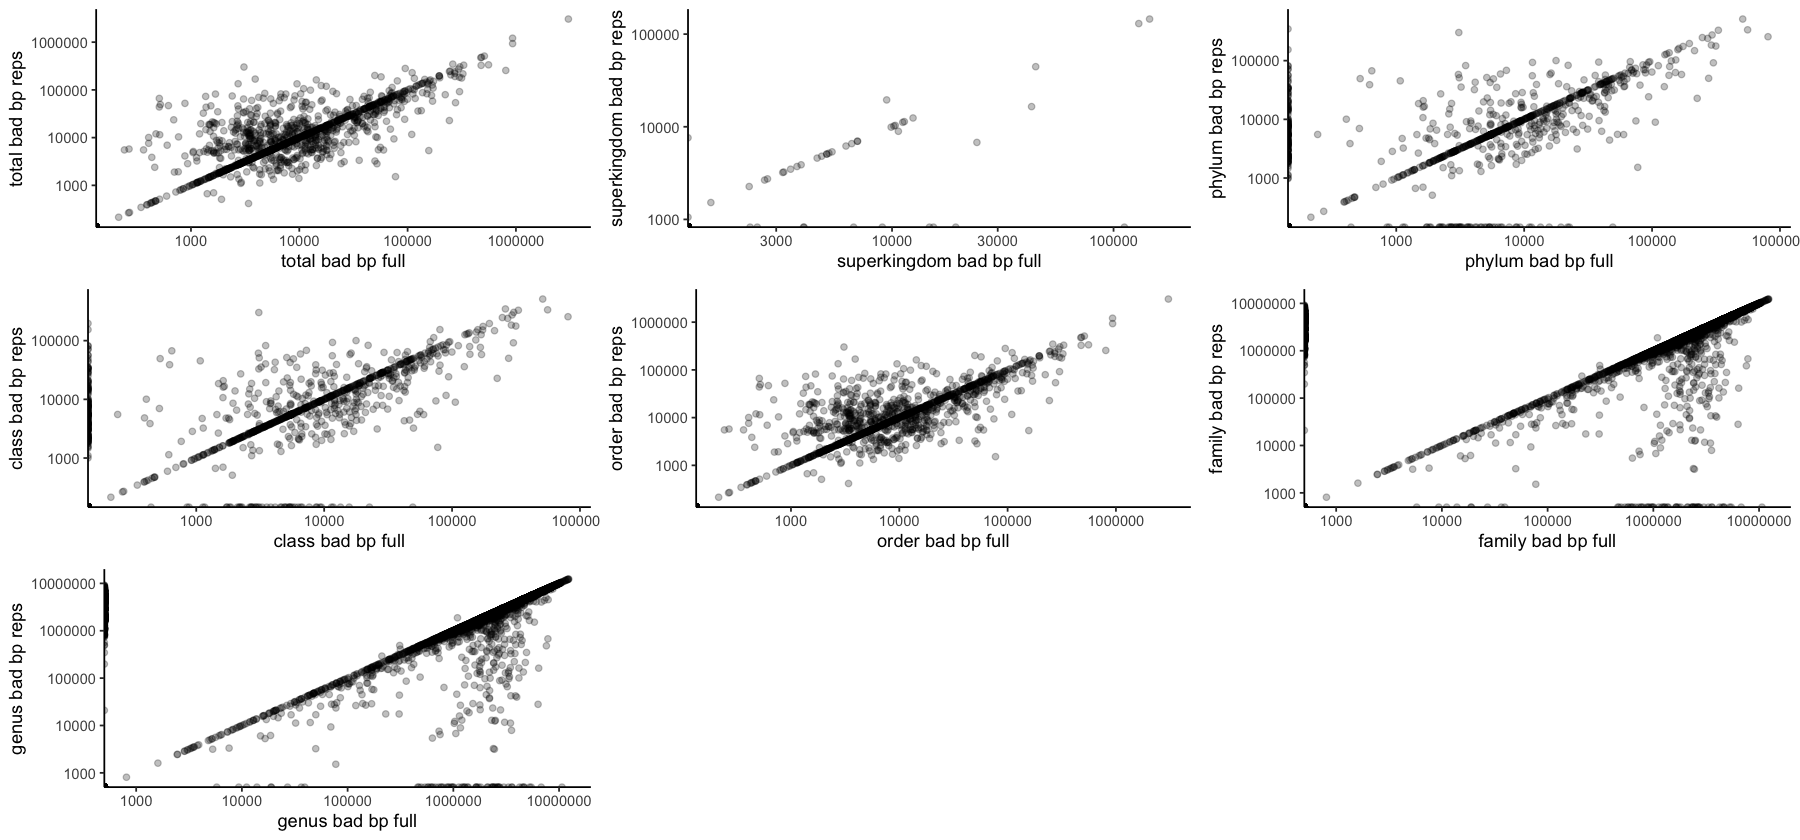

In [20]:
# plot the number of dirty base pairs at each level of taxonomy
total <- ggplot(all, aes(x = total_bad_bp.x, y = total_bad_bp.y)) +
  geom_point(alpha = .25) +
  theme_classic() +
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "total bad bp full", y = "total bad bp reps")

superkingdom <- ggplot(all, aes(x = superkingdom_bad_bp.x, y = superkingdom_bad_bp.y)) +
  geom_point(alpha = .25) +
  theme_classic() +
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "superkingdom bad bp full", y = "superkingdom bad bp reps")

phylum <- ggplot(all, aes(x = phylum_bad_bp.x, y = phylum_bad_bp.y)) +
  geom_point(alpha = .25) +
  theme_classic() +
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "phylum bad bp full", y = "phylum bad bp reps")

class <- ggplot(all, aes(x = class_bad_bp.x, y = class_bad_bp.y)) +
  geom_point(alpha = .25) +
  theme_classic() +
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "class bad bp full", y = "class bad bp reps")

order <- ggplot(all, aes(x = order_bad_bp.x, y = order_bad_bp.y)) +
  geom_point(alpha = .25) +
  theme_classic() +
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "order bad bp full", y = "order bad bp reps")

family <- ggplot(all, aes(x = family_bad_bp.x, y = family_bad_bp.y)) +
  geom_point(alpha = .25) +
  theme_classic() +
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "family bad bp full", y = "family bad bp reps")

genus <- ggplot(all, aes(x = genus_bad_bp.x, y = genus_bad_bp.y)) +
  geom_point(alpha = .25) +
  theme_classic() +
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "genus bad bp full", y = "genus bad bp reps")

ggarrange(total, superkingdom, phylum, class, order, family, genus, nrow = 3, ncol = 3)

Don't totally understand these plot

In [29]:
# the diagonal sort of disappears above. 
# how often do the dirty bp estimates actually differ?
table(all$order_bad_bp.x == all$order_bad_bp.y)


FALSE  TRUE 
  713  9745 

In [31]:
# how often are the reps estimates larger than the full estimates?
table(all$order_bad_bp.x < all$order_bad_bp.y)


FALSE  TRUE 
10076   382 

Warning message:
“Removed 2463 rows containing missing values (geom_point).”
Warning message:
“Removed 2463 rows containing missing values (geom_point).”


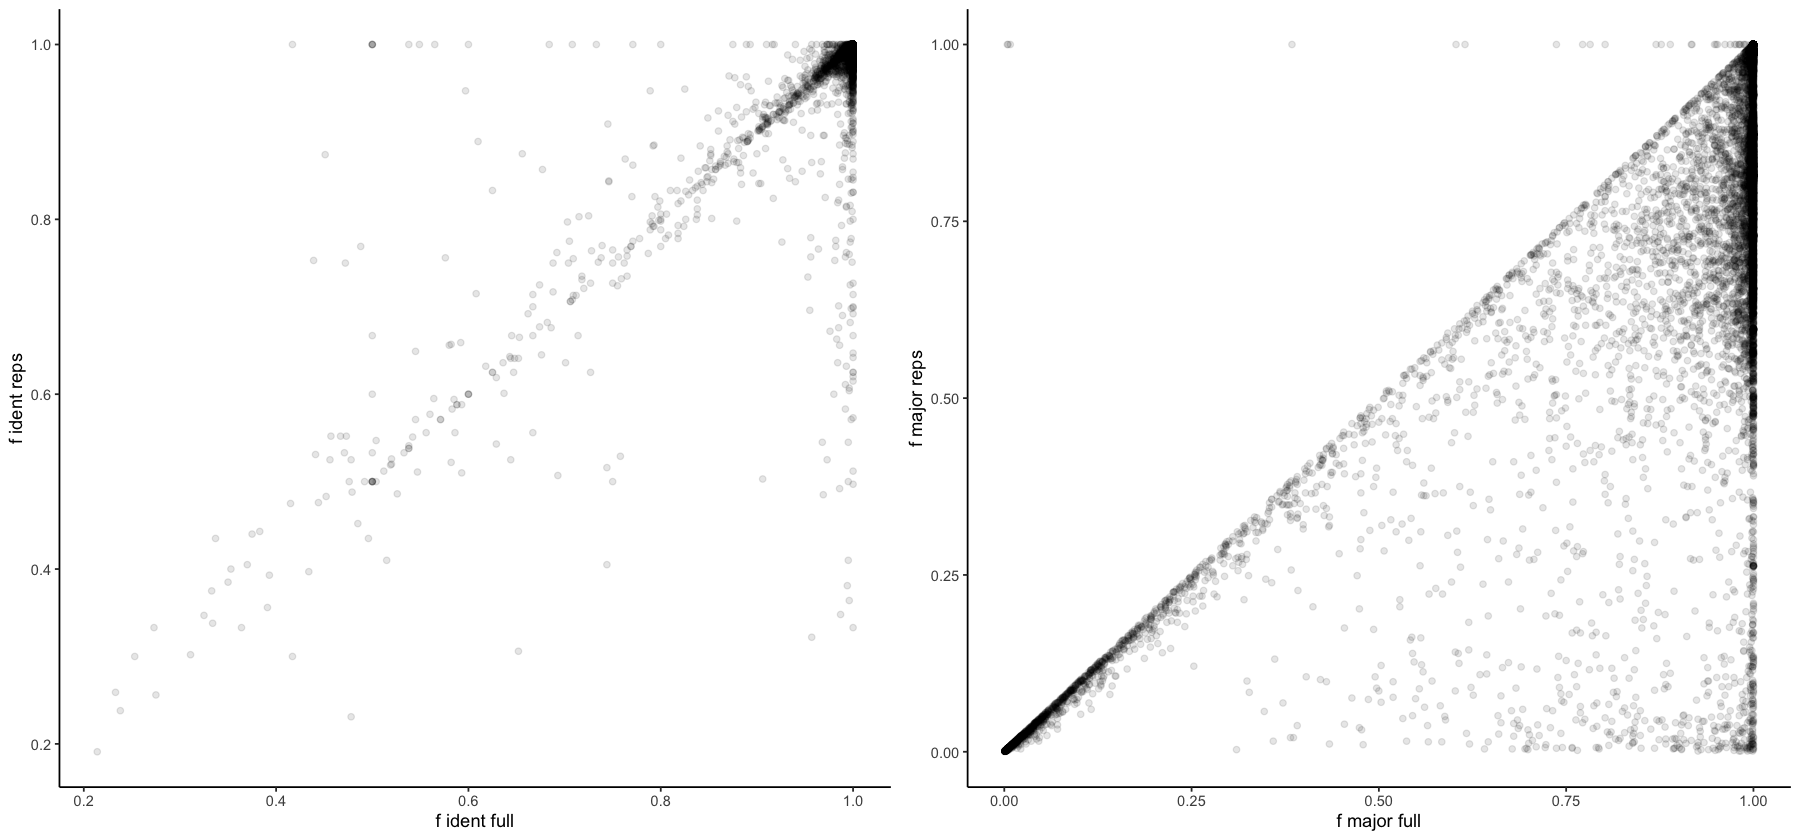

In [25]:
f_ident <- ggplot(all, aes(x = f_ident.x, y = f_ident.y)) +
  geom_point(alpha = .1) +
  theme_classic() +
  labs(x = "f ident full", y = "f ident reps")

f_major <- ggplot(all, aes(x = f_major.x, y = f_major.y)) +
  geom_point(alpha = .1) +
  theme_classic() +
  labs(x = "f major full", y = "f major reps")

ggarrange(f_ident, f_major)

The f_ident and f_major are the estimates for the fraction of the genome that was identifiable, and of that fraction, the fraction that was the major lineage.
Not surprisingly, the f_major is higher for the full database for many genomes — with a more complete database, we identify more of our genome of interest.
In the f_major graph, the dot that falls in the top left corner I think may be a case where charcoal failed silently -- I should probably look at what happened for that bit. I'm not sure what could have occurred for the other points that fall at the top of the graph.